# Imports

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

In [2]:
#!pip install contractions
#!pip install -U textblob
#!python -m textblob.download_corpora
#!python -m textblob.download_corpora
#!pip install langdetect
#Translating the remaining languages into english
#!pip install googletrans

In [3]:
import contractions
import unicodedata
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#### code added below ####
os.chdir('/content/drive/My Drive/Colab Notebooks/')

# Reading the data into df

In [6]:
#Reading the excel into data frame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data (1).xlsx')

In [7]:
df = df.drop('Caller',axis=1) 

In [8]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

In [9]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


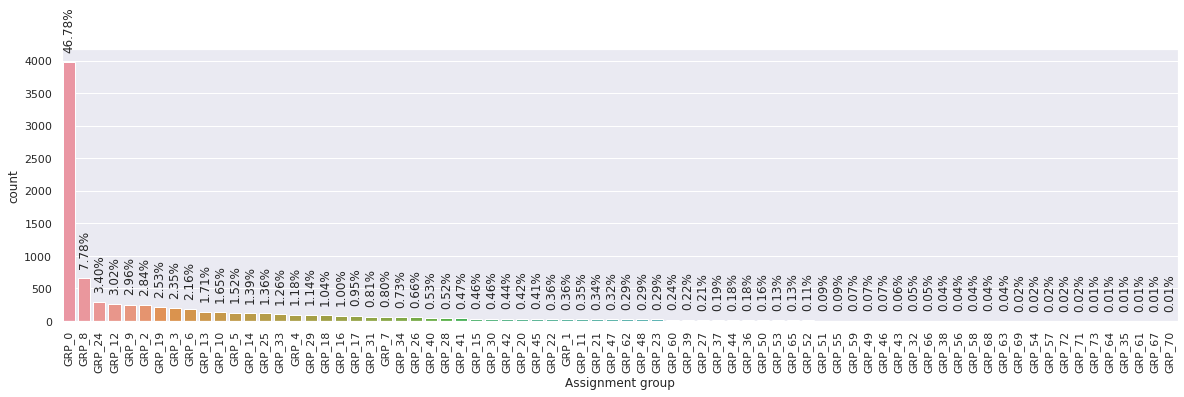

In [10]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

Checking the most repeated top 10 groups

In [11]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [12]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_73,1
1,GRP_64,1
2,GRP_35,1
3,GRP_61,1
4,GRP_67,1
5,GRP_70,1
6,GRP_69,2
7,GRP_54,2
8,GRP_57,2
9,GRP_72,2


Checking the distirbution

In [13]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


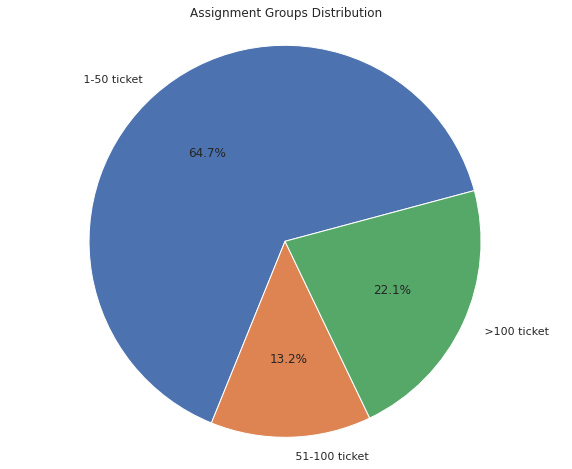

In [14]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [15]:
#checking the null values
df.isnull().sum()

Short description    8
Description          1
Assignment group     0
dtype: int64

In [16]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


In [17]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [18]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Assignment group                        GRP_0
Name: 4395, dtype: object

In [19]:
#Checking for the null values
df.isnull().sum()

Short description    8
Description          0
Assignment group     0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [20]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [21]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(5)

,Description,Assignment group,word_count
2691,usa bd05 printer says it needs drivers updated...,GRP_3,16
1620,need to find old emails on outlook.,GRP_0,7
74,inc1564062: ticket update,GRP_0,3
4987,\r\n\r\nreceived from: rtnzvplq.erhmuncq@gmail...,GRP_26,75
6634,what type of outage: _____network ___x__c...,GRP_8,129


In [22]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1625


In [23]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
6371,\r\n\r\n,GRP_0,0
7397,\r\n,GRP_0,0


In [24]:
#Replacing the Description values with Short description
df=df.replace(df.iloc[6371]['Description'],df.iloc[6371]['Short description'])
df=df.replace(df.iloc[7397]['Description'],df.iloc[7397]['Short description'])

In [25]:
df.iloc[6371]

Short description     authorization add/delete members
Description           authorization add/delete members
Assignment group                                 GRP_0
Name: 6371, dtype: object

In [26]:
df.iloc[7397]

Short description    browser issue : 
Description          browser issue : 
Assignment group                GRP_0
Name: 7397, dtype: object

In [27]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [28]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
6117,received from: monitoring_tool@company.com\r\n...,GRP_8,11,92
5966,name:phil schoenfeld\nlanguage:\nbrowser:micro...,GRP_0,22,180
4192,inc1551048 - ticket update,GRP_0,4,23
4090,ä»Šå¹´å‘ç”Ÿäº†5æ¬¡ç½‘ç»œåœ°å€ä¸¢å¤±ï¼Œéœ€è¦...,GRP_30,2,140
6433,usa print check,GRP_15,3,13


In [29]:
#Checking the minimum character count
feature_df['char_counts'].min()

1

In [30]:
#Checking the maximum character count
feature_df['char_counts'].max()

11105

In [31]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
1973,\r\n\r\nreceived from: ikerxqwz.prkyuitl@gmail...,GRP_29,74,374,0.197861
8108,frequent account lockouts\ncontact no:- \nchg1...,GRP_0,7,56,0.125000
4256,when mm02 is used to change the grade on a rqf...,GRP_20,74,360,0.205556
6335,please se my comments in red.\r\n\r\nviele grÃ...,GRP_34,10,41,0.243902
2648,\r\n\r\nreceived from: brhlcpqv.sfozwkyx@gmail...,GRP_0,22,162,0.135802


In [32]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.0
Maximum avg word count 1.0


In [33]:
print(stop_words)
len(stop_words)

{"'re", 'any', 'as', 'for', 'amongst', 'latter', 'themselves', 'on', 'anyone', 'anyway', 'rather', 'and', 'herein', 'various', 'each', 'whether', 'became', 'would', 'least', 'itself', 'empty', 'quite', '‘s', 'within', 'front', 'between', 'fifty', 'say', 'thereafter', 'above', 'herself', 'somewhere', 'over', 'no', 'throughout', 'few', 'enough', 'yours', 'ten', 'but', '‘ve', 'sometime', 'hundred', 'call', 'well', 'somehow', 'should', '’s', 'have', '’m', 'yourselves', 'those', 'whence', 'myself', 'about', 'unless', 'such', 'among', 'along', 'forty', 'every', 'therefore', 'had', 'both', 'she', 'hereby', 'once', 'himself', 'several', 'seem', 'anywhere', 'even', 'can', 'afterwards', 're', 'through', '‘ll', 'out', 'be', 'regarding', 'whenever', 'whither', 'therein', 'six', 'these', "n't", 'there', 'if', 'then', 'whose', 'ca', 'now', 'without', 'down', 'though', 'is', 'of', 'others', 'used', 'wherein', 'whatever', 'moreover', 'may', 'this', 'more', 'nine', 'him', 'before', 'must', 'so', 'often

326

In [34]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
685,what type of outage: ___x__network _____c...,GRP_8,129,861,0.149826,13
5191,deliver due list ews1 is multiple times runnin...,GRP_18,55,262,0.209924,20
2508,lwgytuxq qspdztiw called in for an issue where...,GRP_4,28,136,0.205882,15
5947,when trying to create an expense report in ess...,GRP_68,32,160,0.200000,14
2922,erp SID_9 password reset,GRP_0,4,21,0.190476,0


In [35]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 354


In [36]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
482,what type of outage: ___x__network _____c...,GRP_8,130,859,0.151339,14,1
4478,received from: monitoring_tool@company.com\r\n...,GRP_9,11,93,0.118280,1,0
1138,what type of outage: _____network __x___c...,GRP_4,130,888,0.146396,13,1
5294,keine tÃ¼r- Ã¶ffnerfunktion bei folgenden zei...,GRP_0,8,101,0.079208,0,0
6980,"hello team,\r\n\r\ncould you please unlock acc...",GRP_0,16,143,0.111888,5,0


In [37]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 457
Minimum number of digits present 0


In [38]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
533,"garthyhtuy was out of office for a long time, ...",GRP_0,27,107,0.252336,16,0,0
3333,received from: monitoring_tool@company.com\r\n...,GRP_6,11,100,0.110000,1,0,0
4020,how did you determine there are network proble...,GRP_14,94,405,0.232099,47,0,0
6454,HostName_108 (plm conversion server - kirty): ...,GRP_14,12,84,0.142857,2,0,0
4427,\r\n\r\nreceived from: jkpwisnf.lgpdyncm@gmail...,GRP_0,12,81,0.148148,5,0,0


In [39]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing



1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets, hence the caller column does not hold any value for the classification. There might be certain correlation However it will add bias. Hence removing the column also



In [40]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [41]:
df['language'].value_counts()

en    7033
de     394
af     262
it     141
fr     124
sv      80
da      72
no      70
nl      64
ca      56
es      55
pl      31
pt      24
ro      17
sq      11
sl      11
cy      11
tl      10
hr       6
fi       5
et       5
so       4
id       4
tr       4
cs       2
lt       2
sw       1
sk       1
Name: language, dtype: int64

In [42]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [43]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['Description'], x['language']), axis=1)

In [44]:
df.sample(5)

,Short description,Description,Assignment group,language,English_Description
2192,uacyltoe hxgaycze,uacyltoe hxgaycze,GRP_0,pl,uacyltoe hxgaycze
1957,job Job_3343 failed in job_scheduler at: 10/09...,received from: monitoring_tool@company.com\r\n...,GRP_8,en,received from: monitoring_tool@company.com\r\n...
5912,wireless outage again-taiwan 0830,\r\n\r\nreceived from: ticqvhal.vgokzesi@gmail...,GRP_4,en,\r\n\r\nreceived from: ticqvhal.vgokzesi@gmail...
1429,telefon defekt,telefon defekt,GRP_33,no,telefon defekt
8045,handheld wireless device activation iphone 5s,handheld wireless device activation iphone 5s,GRP_0,en,handheld wireless device activation iphone 5s


In [45]:
df_translated_text=df.drop(['Description','language'],axis=1)

In [46]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)

In [47]:
#converting the column into lower case
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: str(x).lower())
#Printing sample rows
df_translated_text.sample(5)

,Short description,Assignment group,English_Description
1255,account locked.,GRP_0,account locked.
6888,security incidents - (#in33655554) : errata se...,GRP_2,=========================\nincident overview\n...
6723,collaboration_platform issue,GRP_0,collaboration_platform issue
5504,incident #in33541962 - phishing form submit -...,GRP_2,we are seeing your 18.79.63.203/company-intern...
7403,access to forecast to plan,GRP_22,access to forecast to plan


In [48]:
#Removing unwanted charcters
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Assignment group,English_Description
7642,abended job in job_scheduler: hr_tooldcvcgenratn,GRP_6,received from monitoring_toolcompanycom abende...
6277,sign-on is not working,GRP_0,namemikhghytr karaffalanguagebrowsermicrosoft ...
7303,attendance_tool password,GRP_0,received from xwertljyzrmlhkyqgmailcomhelloatt...
5602,mii is not working. error user authentication ...,GRP_14,mii is not working error user authentication f...
1462,business_client - authorisation,GRP_0,received from vomtbcejlyiwqrctgmailcomhellopl ...


In [49]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)
  

In [50]:
df_translated_text['Expansions']=df_translated_text['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_translated_text.sample(5)

,Short description,Assignment group,English_Description,Expansions
8385,xerox copier prtqx7302 will not scan to email.,GRP_3,xerox copier prtqx7302 will not scan to email,xerox copier prtqx7302 will not scan to email
692,"after my bios was update, i can no longer log ...",GRP_0,i get an error every time that i try to log in...,i get an error every time that i try to log in...
486,job SID_39filesys failed in job_scheduler at: ...,GRP_8,received from monitoring_toolcompanycomjob sid...,received from monitoring_toolcompanycomjob sid...
1770,momitor defekt \niptbwdq csenjruz,GRP_24,momitor defekt niptbwdq csenjruz,momitor defekt niptbwdq csenjruz
2505,unable to find name as sales person in enginee...,GRP_25,unable to find name as sales person in enginee...,unable to find name as sales person in enginee...


In [51]:
#Removing Multiple spaces
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x: ' '.join(x.split()))
#Printing sample values
df_translated_text.sample(5)

,Short description,Assignment group,English_Description,Expansions
2169,query about ticket status.: ticket_no1556096 :...,GRP_0,ticket_no1556096 antjuyhony usa,ticket_no1556096 antjuyhony usa
8284,abended job in job_scheduler: snp_heu_1_regen,GRP_6,received from monitoring_toolcompanycom abende...,received from monitoring_toolcompanycom abende...
2212,kein netzwerkzugang,GRP_12,ich habe an meinem pc nur zugriff auf die inte...,ich habe an meinem pc nur zugriff auf die inte...
1676,outlook on laptop won't startup anymore. error...,GRP_0,nametuzkadxv rxloutpnlanguagebrowsermicrosoft ...,nametuzkadxv rxloutpnlanguagebrowsermicrosoft ...
7722,abended job in job_scheduler: Job_2049,GRP_6,received from monitoring_toolcompanycom abende...,received from monitoring_toolcompanycom abende...


In [52]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [53]:
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Assignment group,English_Description,Expansions
6090,error while changing password in password_mana...,GRP_0,error while changing password in password_mana...,error while changing password in password_mana...
1758,unable to open up emails,GRP_0,unable to open up emails,unable to open up emails
3681,user password,GRP_0,received from bswlorekyhdrlgbsgmailcomhi teamc...,received from bswlorekyhdrlgbsgmailcomhi teamc...
5202,unable to print from the default printer,GRP_0,unable to print from the default printer,unable to print from the default printer
422,password reset,GRP_0,password reset,password reset


In [54]:
df_translated_text['Description_Removed_StopWords']=df_translated_text['Expansions'].apply(lambda t:' '.join([t for t in t.split() if t not in stop_words]))
#Checking for sample rows
df_translated_text.sample(5)

,Short description,Assignment group,English_Description,Expansions,Description_Removed_StopWords
332,folders list in outlook dierppeared,GRP_0,cannot see any of the folders in outlook email...,cannot see any of the folders in outlook email...,folders outlook emails appeared view
3244,urgent: usb ports not working again.,GRP_3,usb ports not working again after replacement ...,usb ports not working again after replacement ...,usb ports working replacement updated chipset ...
6696,collaboration_platform site ownership,GRP_16,received from unrbafjxreyshakwgmailcomhello it...,received from unrbafjxreyshakwgmailcomhello it...,received unrbafjxreyshakwgmailcomhello helpsin...
7542,collaboration_platform online is not opening.,GRP_0,collaboration_platform online is not openinger...,collaboration_platform online is not openinger...,collaboration_platform online openingerror die...
3310,job Job_2110 failed in job_scheduler at: 09/26...,GRP_9,received from monitoring_toolcompanycomjob job...,received from monitoring_toolcompanycomjob job...,received monitoring_toolcompanycomjob job_2110...


In [55]:

#!/opt/anaconda3/bin/python -m pip install -U spacy
#!/opt/anaconda3/bin/python -m spacy download en_core_web_sm

nlp=spacy.load('en_core_web_sm')
def make_to_base(x):
  x=str(x)
  x_list=[]
  doc=nlp(x)
  for token in doc:
    lemma = token.lemma_
    x_list.append(lemma)
  return ' '.join(x_list)

In [56]:
df_translated_text['Description_Removed_StopWords']=df_translated_text['Description_Removed_StopWords'].apply(lambda x:make_to_base(x))
#printing sample values
df_translated_text.sample(5)

,Short description,Assignment group,English_Description,Expansions,Description_Removed_StopWords
7528,unable to launch netweaver,GRP_0,unable to launch netweaver,unable to launch netweaver,unable launch netweaver
5325,job hr_payroll_na_u1 failed in job_scheduler a...,GRP_10,received from monitoring_toolcompanycomjob hr_...,received from monitoring_toolcompanycomjob hr_...,receive monitoring_toolcompanycomjob hr_payrol...
4017,"cannot create engineering tool task for er,",GRP_25,cannot create engineering tool task for er ple...,cannot create engineering tool task for er ple...,create engineering tool task er help deal with...
384,engineering_tool upload issue,GRP_25,from ufgkybsh ijswtdve sent tuesday october 25...,from ufgkybsh ijswtdve sent tuesday october 25...,ufgkybsh ijswtdve send tuesday october 25 2016...
7732,recall: ticket_no1536413 -- comments added,GRP_0,received from franhtyuliucompanycomfranhtyu li...,received from franhtyuliucompanycomfranhtyu li...,receive franhtyuliucompanycomfranhtyu liu like...


In [57]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [58]:
df_translated_text['cleaned_description'] = df_translated_text['Description_Removed_StopWords'].apply(lambda x: clean_text(x))


In [59]:
df_translated_text['number_of_words'] = df_translated_text['cleaned_description'].apply(lambda x: len(x.split()))

In [60]:
df_translated_text.head()

,Short description,Assignment group,English_Description,Expansions,Description_Removed_StopWords,cleaned_description,number_of_words
0,login issue,GRP_0,verified user detailsemployee manager nameche...,verified user detailsemployee manager namechec...,verify user detailsemployee manager namechecke...,verify user detailsemployee manager namechecke...,16
1,outlook,GRP_0,received from hmjdrvpbkomuaywngmailcomhello te...,received from hmjdrvpbkomuaywngmailcomhello te...,receive hmjdrvpbkomuaywngmailcomhello teammy m...,receive hmjdrvpbkomuaywngmailcom teammy meetin...,13
2,cant log in to vpn,GRP_0,received from eylqgodmybqkwiamgmailcomhii cann...,received from eylqgodmybqkwiamgmailcomhii cann...,receive eylqgodmybqkwiamgmailcomhii log vpnbest,receive eylqgodmybqkwiamgmailcomi log vpn,4
3,unable to access hr_tool page,GRP_0,unable to access hr_tool page,unable to access hr_tool page,unable access hr_tool page,unable access hr_tool page,4
4,skype error,GRP_0,skype error,skype error,skype error,skype error,2


In [61]:
df_text = df_translated_text.drop(['Short description','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

In [62]:
df_text.head()

,Assignment group,cleaned_description,number_of_words
0,GRP_0,verify user detailsemployee manager namechecke...,16
1,GRP_0,receive hmjdrvpbkomuaywngmailcom teammy meetin...,13
2,GRP_0,receive eylqgodmybqkwiamgmailcomi log vpn,4
3,GRP_0,unable access hr_tool page,4
4,GRP_0,skype error,2


In [63]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 1310
Minimum no of words 0


In [64]:
df_text=df_text[df_text['number_of_words']>0]


In [65]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [66]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)


In [67]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [68]:
df_text=df_text.replace(list_1,'Others')

In [69]:
len(df_text['Assignment group'].value_counts().unique())

21

In [70]:
df_text.sample(10)

,Assignment group,cleaned_description,number_of_words
7955,GRP_0,namekargthytklanguagebrowsermicrosoft internet...,15
5763,GRP_8,type outage _ _ x___network _ _ _ _ _ circuit ...,273
5707,Others,edit user hang forever user admin management s...,12
2114,GRP_12,receive umdyvbxoqwzstijrgmailcomi need access ...,9
530,GRP_0,unable connect company center sale org work,7
3045,GRP_0,unable view data distributor_tool account,5
4654,GRP_0,remove mail box outlook,4
687,GRP_0,receive dceoufyzsaufqkmdgmailcommy outlook app...,6
3339,GRP_8,receive monitoring_toolcompanycomjob job_3049 ...,7
2744,GRP_0,benoittry unable login distributor_tool wait p...,11


# Tokenization

In [71]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_text['token_desc'] = df_text['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [72]:
df_text['token_desc'].head()

0    [verify, user, detailsemployee, manager, namec...
1    [receive, hmjdrvpbkomuaywngmailcom, teammy, me...
2       [receive, eylqgodmybqkwiamgmailcomi, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: token_desc, dtype: object

In [73]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df_text['token_desc'] = df_text['token_desc'].apply(lambda x : combine_text(x))

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_text['token_desc'])

In [75]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
receive,2.270566
job_scheduler,3.167013
fail,3.254494
password,3.276172
erp,3.309001
fail job_scheduler,3.344177
monitoring_toolcompanycomjob,3.374255
receive monitoring_toolcompanycomjob,3.374255
unable,3.413170
reset,3.435913


In [77]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
549680216,8.095301
deny tcp,7.738626
tcp src,7.738626
dst,7.556305
accessgroup,7.556305
asa4106023 deny,7.556305
src,7.556305
asa4106023,7.556305
acl_inside,7.556305
accessgroup acl_inside,7.556305


In [78]:
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27659,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.701831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.684884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.735262,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.677783,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.382476,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.378293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.692293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.467200,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.543187,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df_inc['Assignment_group']= df_text['Assignment group']
df_inc['token_desc']=df_text['token_desc']

In [80]:
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,Assignment_group,token_desc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27659,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.701831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,verify user detailsemployee manager namechecke...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,receive hmjdrvpbkomuaywngmailcom teammy meetin...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.684884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,receive eylqgodmybqkwiamgmailcomi log vpn
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.735262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.677783,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,unable access hr_tool page
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,skype error


In [81]:
df_inc_sample = df_inc[df_inc['Assignment_group'].map(df_inc['Assignment_group'].value_counts()) > 100]

In [82]:
df_inc_sample = df_text[df_text['Assignment group'].map(df_text['Assignment group'].value_counts()) > 100]

In [83]:
df_inc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8048 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Assignment group     8048 non-null   object
 1   cleaned_description  8048 non-null   object
 2   number_of_words      8048 non-null   int64 
 3   token_desc           8048 non-null   object
dtypes: int64(1), object(3)
memory usage: 314.4+ KB


## Let use word cloud to visualize the type of words used in Description

One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here our words can simply be taken from the column "text"

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [85]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

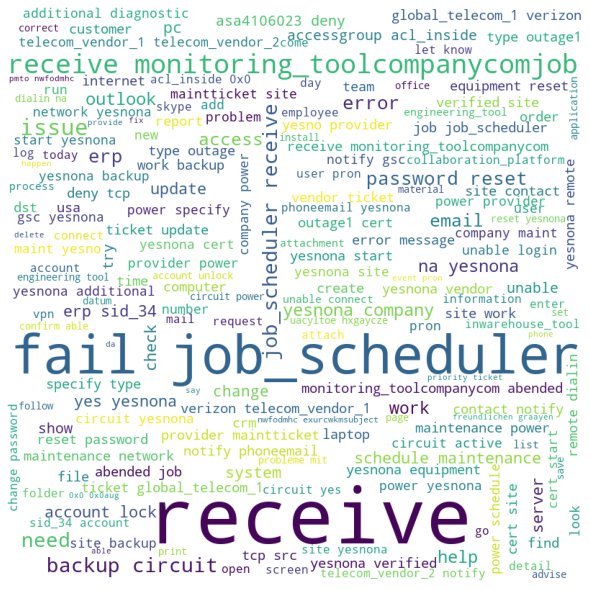

In [86]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_text.cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Lets view the word cloud of top 3 assignment groups to see the kind of tickets assigned to them

##### Word Cloud for tickets with Assignment group 'GRP_0'

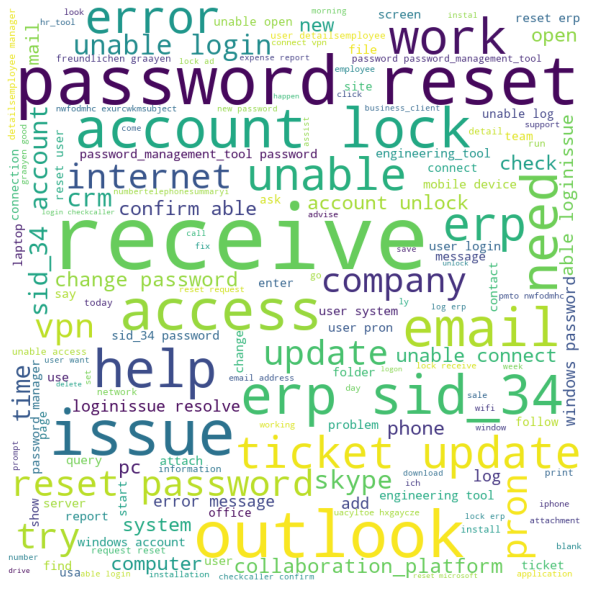

In [87]:
wordcloud = f_word_cloud(df_text[df_text['Assignment group']=='GRP_0'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_0 seems to have tickets related to password reset, access issues , login issue, connectivity issue etc..

##### Word Cloud for tickets with Assignment group 'GRP_8'

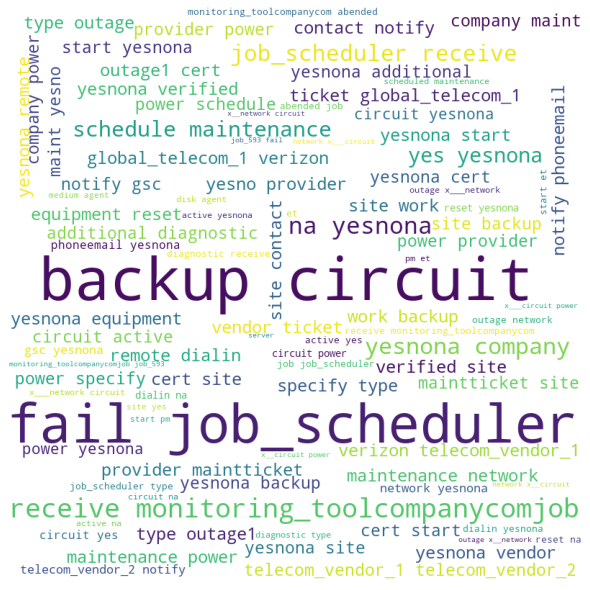

In [88]:
wordcloud = f_word_cloud(df_text[df_text['Assignment group']=='GRP_8'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

##### Word Cloud for tickets with Assignment group 'GRP_12'

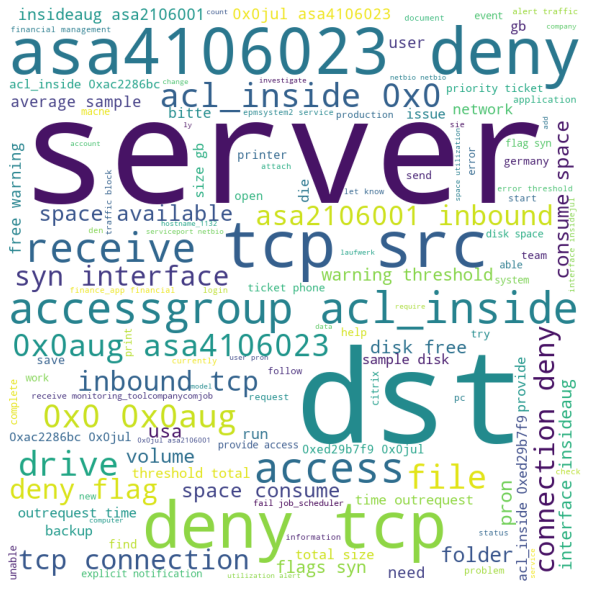

In [89]:
wordcloud = f_word_cloud(df_text[df_text['Assignment group']=='GRP_12'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_12 contains tickets related to systems like  disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.

#Split the dataset and label encoding

In [90]:
X = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


In [92]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

In [93]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
vectorizer = CountVectorizer(ngram_range = (1,2), stop_words=stopwords.words('english'), 
                             min_df = 0.05, max_df = 0.8, max_features = 100)

In [95]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

<6036x22 sparse matrix of type '<class 'numpy.int64'>'
	with 11733 stored elements in Compressed Sparse Row format>

In [96]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['access',
 'account',
 'company',
 'email',
 'erp',
 'error',
 'fail',
 'fail job_scheduler',
 'help',
 'issue']

# Logistic Regression Model

In [97]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr = OneVsRestClassifier(lr)

ovr.fit(X_train_dtm, y_train)
y_pred_ovr_test = ovr.predict(X_test_dtm)
y_pred_ovr_test

array([ 0,  0, 13, ...,  0,  0,  0])

In [98]:
ovr.fit(X_train_dtm, y_train)
pred = ovr.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
linear_acc=accuracy_score(y_test,pred)

0.5695825049701789


In [99]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       997
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        58
           6       0.88      0.22      0.35        65
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        49
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        45
          13       0.51      0.85      0.64       165
          14       0.00      0.00      0.00        61
          15       0.32      0.02      0.04       258

    accuracy                           0.57      2012
   macro avg       0.14   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


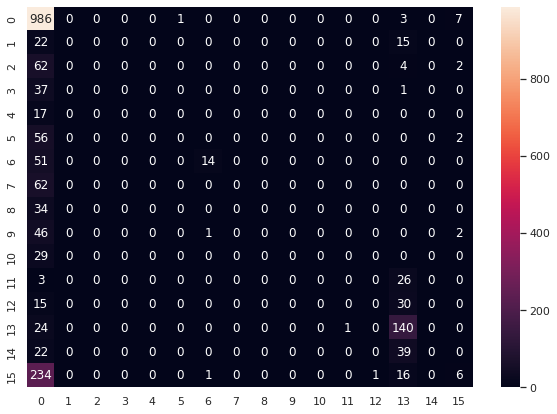

In [100]:
conf_mat = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 16)],
                  columns = [i for i in range(0, 16)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

# Linear SVC

In [101]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train_dtm, y_train)
pred = lsvc.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
SVC_acc=accuracy_score(y_test,pred)
conf_mat = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))


0.5695825049701789
              precision    recall  f1-score   support

           0       0.58      0.99      0.73       997
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        58
           6       0.88      0.22      0.35        65
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        49
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        45
          13       0.51      0.85      0.64       165
          14       0.00      0.00      0.00        61
          15       0.26      0.02      0.04       258

    accuracy                           0.57      2012
   macr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

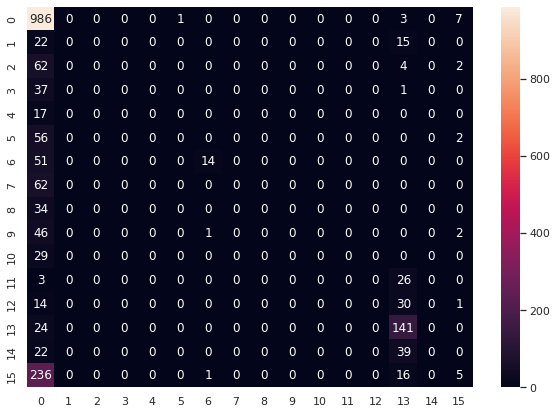

In [102]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 16)],
                  columns = [i for i in range(0, 16)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

# Bernoullis Classifier

In [103]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
pred = clf.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
ber_acc=accuracy_score(y_test,pred)
print(pred)

0.5208747514910537
[ 0  0 14 ...  0  0  0]


In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72       997
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        58
           6       0.46      0.25      0.32        65
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        49
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        45
          13       0.32      0.07      0.12       165
          14       0.18      0.56      0.27        61
          15       0.28      0.02      0.04       258

    accuracy                           0.52      2012
   macro avg       0.11   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


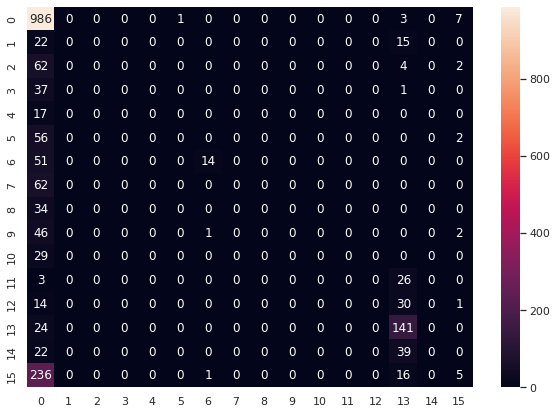

In [105]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 16)],
                  columns = [i for i in range(0, 16)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [106]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression', 'Linear SVC', 'Bernoullis Classifier'],'Accuracy (%)':[linear_acc*100,SVC_acc*100,ber_acc*100]})

print("Following table shows comparison of the classification algorithms: ")
df_comp

Following table shows comparison of the classification algorithms: 


,Classification Algorithm,Accuracy (%)
0,Logistic Regression,56.958250
1,Linear SVC,56.958250
2,Bernoullis Classifier,52.087475


# New section

In [107]:
df_1=df_text[df_text['Assignment group']=='GRP_0']
df_2=df_text[df_text['Assignment group']!='GRP_0']

  

In [108]:
def dataframe(i1,i2):
  df_3=df_1.iloc[i1:i2]
  final_df=pd.concat([df_3,df_2],axis=0)
  return final_df

In [109]:
final_df=dataframe(500,1000)
X = final_df['cleaned_description']
y = final_df['Assignment group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [110]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm
ovr.fit(X_train_dtm, y_train)
y_pred_ovr_test = ovr.predict(X_test_dtm)
y_pred_ovr_test

array(['Others', 'Others', 'Others', ..., 'Others', 'Others', 'Others'],
      dtype='<U6')

In [111]:
pred = ovr.predict(X_test_dtm)
print(accuracy_score(y_test, pred))

0.322061191626409


In [112]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       GRP_0       0.44      0.28      0.35       134
      GRP_10       0.00      0.00      0.00        39
      GRP_12       0.12      0.02      0.03        63
      GRP_13       0.20      0.02      0.04        43
      GRP_14       0.40      0.08      0.13        26
      GRP_16       0.00      0.00      0.00        18
      GRP_17       0.00      0.00      0.00         6
      GRP_18       0.00      0.00      0.00        23
      GRP_19       0.45      0.08      0.14        59
       GRP_2       0.48      0.19      0.27        58
      GRP_24       0.00      0.00      0.00        74
      GRP_25       0.00      0.00      0.00        27
      GRP_29       0.00      0.00      0.00        22
       GRP_3       0.00      0.00      0.00        41
      GRP_33       0.00      0.00      0.00        31
       GRP_4       0.00      0.00      0.00        27
       GRP_5       1.00      0.03      0.06        31
       GRP_6       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
df_new = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data (1).xlsx',skiprows=1)

In [114]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [115]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe


# Label Encoding 'Assignment group' target class 

In [116]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
#otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
#itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
df_text['Assignment group'],grp_mapping_all_raw = labelencoder(df_text['Assignment group'])

In [117]:
df_text.sample(10)

,Assignment group,cleaned_description,number_of_words,token_desc
357,11,eu_tool aktualisierung alle 15 min lauft nicht,7,eu_tool aktualisierung alle 15 min lauft nicht
7480,3,vnhaycfo smkpfjzv earthworks usa customer orde...,13,vnhaycfo smkpfjzv earthworks usa customer orde...
2410,19,receive monitoring_toolcompanycomjob job_1355 ...,7,receive monitoring_toolcompanycomjob job_1355 ...
1513,0,engineering_tool company company work,4,engineering_tool company company work
3710,3,pricing team comment advise mention material,6,pricing team comment advise mention material
3774,0,namebrandhyht s muthdyrtalanguagebrowsermicros...,18,namebrandhyht s muthdyrtalanguagebrowsermicros...
5536,0,log balancing error connect vpn,5,log balancing error connect vpn
6132,16,receive monitoring_toolcompanycomjob sid_48hot...,7,receive monitoring_toolcompanycomjob sid_48hot...
2213,0,receive nxhwyeplmudstbxogmailcom reset passwor...,11,receive nxhwyeplmudstbxogmailcom reset passwor...
2895,0,unable attach attachment expense report,5,unable attach attachment expense report


# Word2Vec embedding 

In [118]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [119]:
sentences = [line.split(' ') for line in df_text['cleaned_description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

In [120]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 25801 word vectors.


In [121]:
maxlen = 300
numWords=9000
epochs = 10

In [122]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

# LSTM Model

In [123]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train,_, y_train,_, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [124]:
df_text.dtypes

Assignment group        int64
cleaned_description    object
number_of_words         int64
token_desc             object
dtype: object

In [125]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_text,100,epochs)
rawData_accuracy = lstmModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 100)          900100    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)   

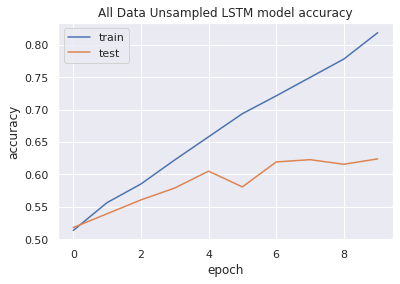

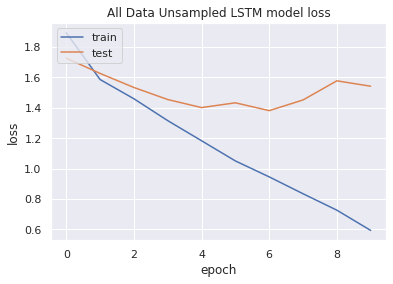

In [126]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [127]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,lstmModelRawData_history,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',rawData_accuracy,0)

# Glove embedding

In [128]:
#download the glove embedding from https://nlp.stanford.edu/projects/glove/
glove_file = project_path + "glove.6B.zip"
print(glove_file)

/content/drive/My Drive/Colab Notebooks/glove.6B.zip


In [129]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [130]:
# EMBEDDING_FILE = './glove.6B.200d.txt'
EMBEDDING_FILE = './glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [131]:
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["platform"])))

Dimension of the embedding vector is 100
Dimension of the embedding vector is 100


In [132]:
maxlen = 300
numWords=9000
epochs = 10

# LSTM Model with Glove embedding

In [133]:
class LstmGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [134]:
# Check how the LSTM Model perform with the cleansed data
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmGloveModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_text,100,epochs)
lstm_raw_accuracy = lstmModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 1.9630 - accuracy: 0.5009
Epoch 00001: val_accuracy improved from -inf to 0.52694, saving model to model-001-0.526939.h5
68/68 [==============================] - 132s 2s/step - loss: 1.9630 - accuracy: 0.5009 - val_loss: 1.6852 - val_accuracy: 0.5269 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 1.5017 - accuracy: 0.5690
Epoch 00002: val_accuracy improved from 0.52694 to 0.55181, saving model to model-002-0.551806.h5
68/68 [==============================] - 127s 2s/step - loss: 1.5017 - accuracy: 0.5690 - val_loss: 1.5218 - val_accuracy: 0.5518 - lr: 0.0010
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 1.3157 - accuracy: 0.6153
Epoch 00003: val_accuracy improved from 0.55181 to 0.58319, saving model to model-003-0.583185.h5
68/68 [============================

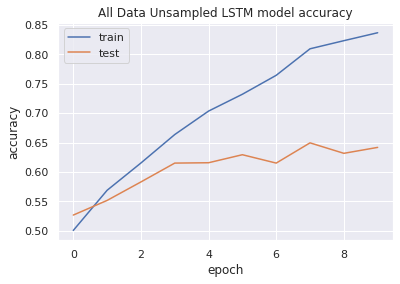

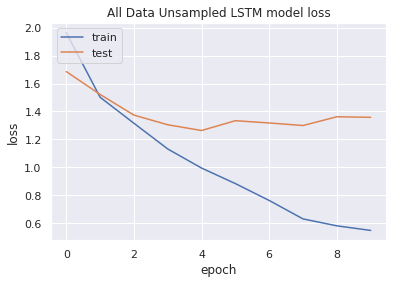

In [135]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [136]:
results=captureData(results,lstmModelRawData_history,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','2',lstm_raw_accuracy,0)

# GRU Model 

In [137]:
class GruGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    gru=GRU(128)(embed)
    drop=Dropout(0.3)(gru)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    # self.model.summary()
    # plot_model(self.model,to_file="GRU.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy=metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def plotModel(self):
    self.model.summary()

In [138]:
# Check how the GRU Model perform with the cleansed data
# Check how the LSTM Model perform with the cleansed data
gruModelRawData = GruGloveModel()
gruModelRawData_history, model = gruModelRawData.train(df_text,100,epochs)
gruRaw_accuracy = gruModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 1.9421 - accuracy: 0.5077
Epoch 00001: val_accuracy improved from -inf to 0.50977, saving model to model-001-0.509769.h5
68/68 [==============================] - 56s 793ms/step - loss: 1.9421 - accuracy: 0.5077 - val_loss: 1.8338 - val_accuracy: 0.5098 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 1.6443 - accuracy: 0.5463
Epoch 00002: val_accuracy improved from 0.50977 to 0.52872, saving model to model-002-0.528715.h5
68/68 [==============================] - 54s 792ms/step - loss: 1.6443 - accuracy: 0.5463 - val_loss: 1.6763 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 1.4588 - accuracy: 0.5874
Epoch 00003: val_accuracy improved from 0.52872 to 0.56483, saving model to model-003-0.564831.h5
68/68 [========================

In [139]:
gruModelRawData.plotModel()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 100)          900100    
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dense_5 (Dense)             (None, 21)                2121      
                                                                 
Total params: 1,003,441
Trainable params: 1,003,441
Non-tra

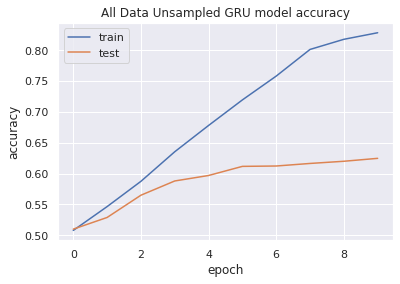

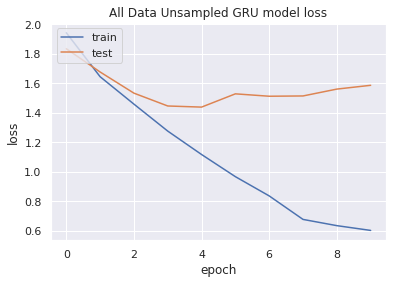

In [140]:
gruModelRawData.plotModelAccuracy(gruModelRawData_history, 'All Data Unsampled GRU')

In [141]:
results=captureData(results,gruModelRawData_history,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','3',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','3',gruRaw_accuracy,0)

# RNN Model

In [142]:
class RNNGloveModel:
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def train(self, dataframe, batch_size, epochs):
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)
    model=Sequential()
    model.add(Input(shape=(maxlen,),dtype=tf.int64))
    model.add(embed)
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    plot_model(model,to_file="RNN.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val, y_Val))
    return model_history, model

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [143]:
# Check how the RNN Model perform with the cleansed data
RNNModelRawData = RNNGloveModel()
RNNModelRawData_history, RnnModel = RNNModelRawData.train(df_text,100,epochs)
RNNModelRawData_accuracy = RNNModelRawData.prediction(RnnModel)

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 100)          900100    
                                                                 
 conv1d (Conv1D)             (None, 291, 100)          100100    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 145, 100)         0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 145, 100)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 136, 100)          100100    
                                                                 
 max_pooling1d_1

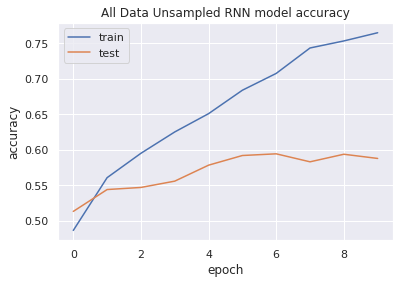

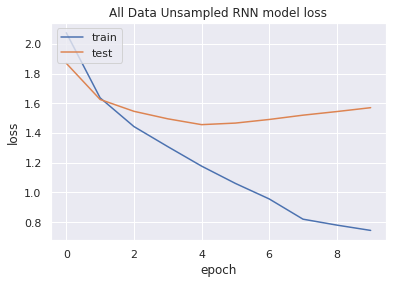

In [144]:
RNNModelRawData.plotModelAccuracy(RNNModelRawData_history, 'All Data Unsampled RNN')

In [145]:
# results=pd.DataFrame()
results=captureData(results,RNNModelRawData_history,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','4',0)
pred_results= capturePrediction(pred_results,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','4',RNNModelRawData_accuracy,0)

In [146]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_rawdata,0.624038,1.542539,0.592985,0.818774,LSTM+Word2Vec Embedding on raw data
2,LSTM model_GloVe_rawdata,0.649497,1.299551,0.631654,0.809150,LSTM+GloVe Embedding on raw data
3,GRU model_GloVe_rawdata,0.624630,1.586192,0.603625,0.828398,GRU+GloVe Embedding on raw data
4,RNN model_GloVe_rawdata,0.594435,1.491548,0.956497,0.707729,RNN+GloVe Embedding on raw data


In [147]:
pred_results

,model,Pred_Accuracy,descriptions
1,LSTM model_WV_rawdata,0.624038,LSTM+Word2Vec Embedding on raw data
2,LSTM model_GloVe_rawdata,0.641800,LSTM+GloVe Embedding on raw data
3,GRU model_GloVe_rawdata,0.624630,GRU+GloVe Embedding on raw data
4,RNN model_GloVe_rawdata,0.587922,RNN+GloVe Embedding on raw data
